In [11]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = (12, 8)

C:\python3\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:55: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\python3\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:56: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\python3\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:67: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\python3\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:79: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-100, 1100)

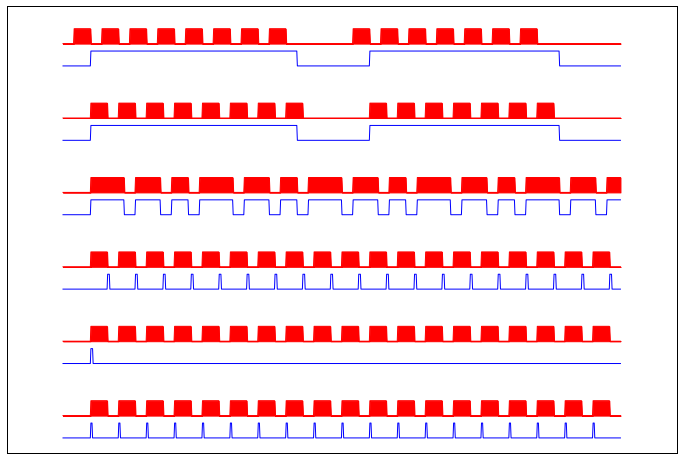

In [42]:
N = 1000
t = np.arange(N)
exposures = np.zeros(N)
triggers = np.zeros(N)

t_exp = 30
t_cyc = 50
t_trig = 4
t_delay = 50

d_offset = 5

fig, ax = plt.subplots()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

def add_to_plot():
    ax.plot(t, offset + 1.5 + exposures, 'r-')
    ax.fill_between(t, offset+1.5+exposures, N*[offset+1.5], color='red')
    ax.plot(t, offset + triggers, 'b-') 

# Before, once
offset = 0
for i in range(t_delay, N, t_cyc):
    triggers[i:i+3] = 1
    exposures[i:i+t_exp] = 1
add_to_plot()

# Before, many
offset += d_offset
triggers[0:N] = 0
exposures[0:N] = 0
triggers[t_delay:t_delay+t_trig] = 1
for i in range(t_delay, N, t_cyc):
    exposures[i:i+t_exp] = 1
add_to_plot()

# After, once
offset += d_offset
triggers[0:N] = 0
exposures[0:N] = 0
for i in range(t_delay+t_exp, N, t_cyc):
    exposures[i-t_exp:i] = 1
    triggers[i:i+t_trig] = 1
add_to_plot()

# Bulb
offset += d_offset
triggers[0:N] = 0
exposures[0:N] = 0
i = t_delay
while (i < N ):
    ind = int(i%3)
    my_t_exp = [1, 1.5, 2][ind] * t_exp
    exposures[i:i+my_t_exp] = 1
    triggers[i:i+my_t_exp] = 1
    i += int(my_t_exp + (t_cyc - t_exp))
add_to_plot()

# Gated, before
offset += d_offset
triggers[0:N] = 0
exposures[0:N] = 0
i = t_delay
triggers[i:i+(8*t_cyc)-t_exp] = 1
i += 10 * t_cyc
triggers[i:i+(7*t_cyc)-(t_exp/3)] = 1
for i in range(t_delay, N, t_cyc):
    exposures[i:i+t_exp] = triggers[i]
add_to_plot()

# Gated, after
offset += d_offset
triggers[0:N] = 0
exposures[0:N] = 0
i = t_delay
triggers[i:i+(8*t_cyc)-t_exp] = 1
i += 10 * t_cyc
triggers[i:i+(7*t_cyc)-(t_exp/3)] = 1
for i in range(t_delay, N, t_cyc):
    exposures[i-t_exp:i] = triggers[i]
add_to_plot()

ax.set_ylim(-1, offset+4)        
ax.set_xlim(-100, 1100)